<a href="https://colab.research.google.com/github/Kingx959/Neural-Networks/blob/main/NN_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
# create a model class that inherits the nn.Module

class Model(nn.Module):

  def __init__(self, in_features=4, h1=12, h2=6, out_features=3):  # iris dataset has 4 features (predictors), as well as 3 possible classes for the output
    super().__init__()   # This calls the constructor of the nn.Module superclass to ensure that the parent class (nn.Module) is properly initialized before defining the actual layers in the model.
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out  = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [ ]:
torch.manual_seed(1088)

model = Model()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [ ]:
URL = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
df = pd.read_csv(URL)

df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Transform the 'variety' column (class labels) into numeric labels
df['species_encoded'] = label_encoder.fit_transform(df['species'])

# Now, df['variety_encoded'] contains numeric labels
print(df[['species', 'species_encoded']])

       species  species_encoded
0       setosa                0
1       setosa                0
2       setosa                0
3       setosa                0
4       setosa                0
..         ...              ...
145  virginica                2
146  virginica                2
147  virginica                2
148  virginica                2
149  virginica                2

[150 rows x 2 columns]


In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,species,species_encoded
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


In [ ]:
X = df.drop('species', axis=1).drop('species_encoded', axis=1).values
y = df['species_encoded'].values

now we need to convert our data into numpy arrays

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

measure how far off our predictions are from the know outputs, using nn.CrossEntropyLoss()

In [ ]:
loss = nn.CrossEntropyLoss()

#optimizer choice
optimizer = torch.optim.Adam(model.parameters(), lr=0.01) #tweaking this learning rate depending on dataset  size is very important.

passing in our nn.Model(), but need to determine how many epochs we want. Epoch is how many times we send the training data through our network.

In [ ]:
epochs = 100
Losses = []

for i in range(epochs):
  ypred = model.forward(X_train)
  loss_value = loss(ypred, y_train)
  Losses.append(loss_value)

  if i % 10 ==0:
    print(f'Epoch: {i} Loss: {loss_value}')

  optimizer.zero_grad()
  loss_value.backward()
  optimizer.step()

Epoch: 0 Loss: 1.1295830011367798
Epoch: 10 Loss: 0.9452987909317017
Epoch: 20 Loss: 0.7501503825187683
Epoch: 30 Loss: 0.6451736688613892
Epoch: 40 Loss: 0.5393273234367371
Epoch: 50 Loss: 0.4309307336807251
Epoch: 60 Loss: 0.32121187448501587
Epoch: 70 Loss: 0.23799492418766022
Epoch: 80 Loss: 0.18768413364887238
Epoch: 90 Loss: 0.15867619216442108


Text(0.5, 0, 'epoch')

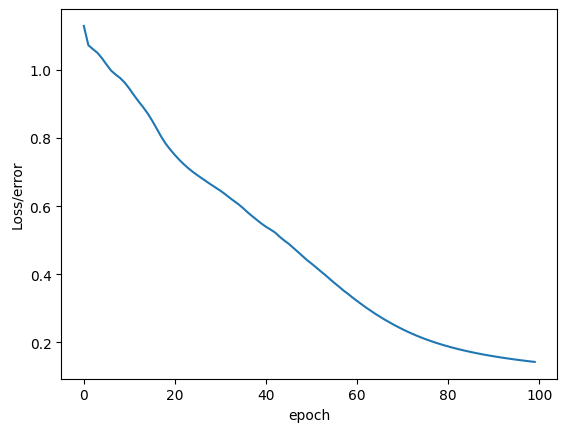

In [ ]:
# Assuming `Losses` is a list of tensors:
Losses = [loss.detach().numpy() for loss in Losses]

plt.plot(range(epochs), Losses)
plt.ylabel('Loss/error')
plt.xlabel('epoch')